In [1]:
import math
import numpy as np
import scipy.stats as scs 
import matplotlib.pyplot as plt 
import numpy.random as random
from copy import copy
import seaborn as sns
sns.set_theme()

# Exercice 15

In [2]:
def non_convergence_ps_CLT(N):
    alea = random.random(N)
    scaled_1 = (lambda x : x-1/2)(np.cumsum(alea) / np.arange(1, N+1))
    scaled_2 = (lambda x : np.sqrt(12*x))(np.arange(1, N+1))
    fig, ax = plt.subplots(figsize=(10,5))
    ax.plot(np.arange(1, N+1), scaled_1*scaled_2, color="blue")
    ax.set_ylabel("$Z_n$")
    ax.set_xlabel("$n$")
    ax.set_title("Fluctuations renormalisées des sommes de variables uniformes indépendantes")
    plt.show()

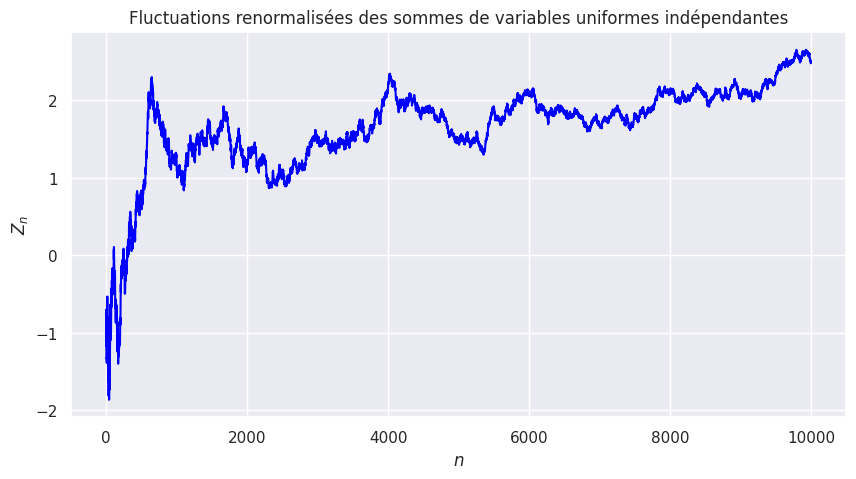

In [3]:
non_convergence_ps_CLT(10000)

In [4]:
def convergence_en_loi_CLT(N, M):
    alea = random.random((N, M))
    Zalea = (lambda x : np.sqrt(12*N) * (x/N - 1/2))(alea.sum(axis=0))
    fig, ax = plt.subplots(figsize=(10,5))
    xx = np.linspace(min(Zalea), max(Zalea), 500)
    ax.plot(xx, scs.norm.cdf(xx), color="black")
    ax.ecdf(Zalea)
    plt.show()

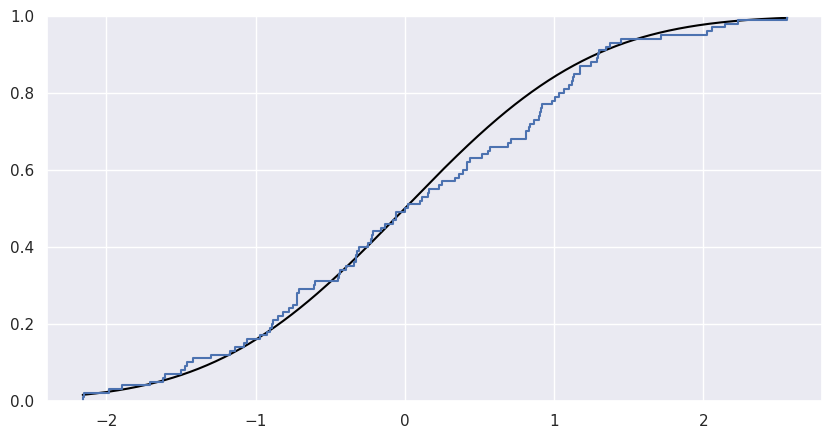

In [5]:
convergence_en_loi_CLT(10,100)


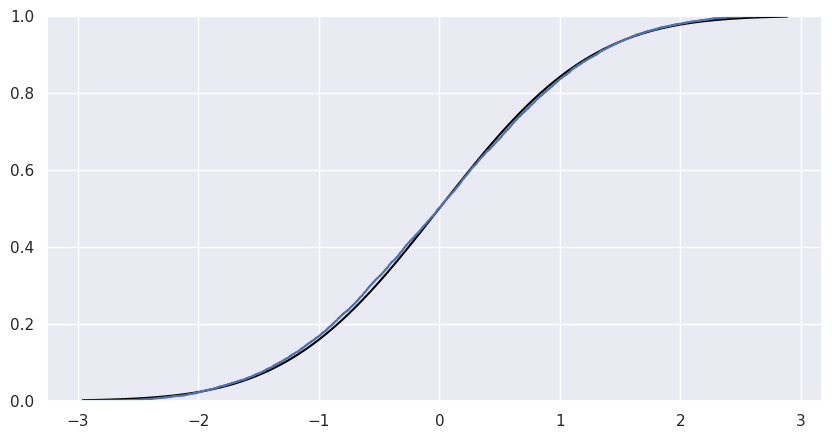

In [6]:
convergence_en_loi_CLT(3,10000)

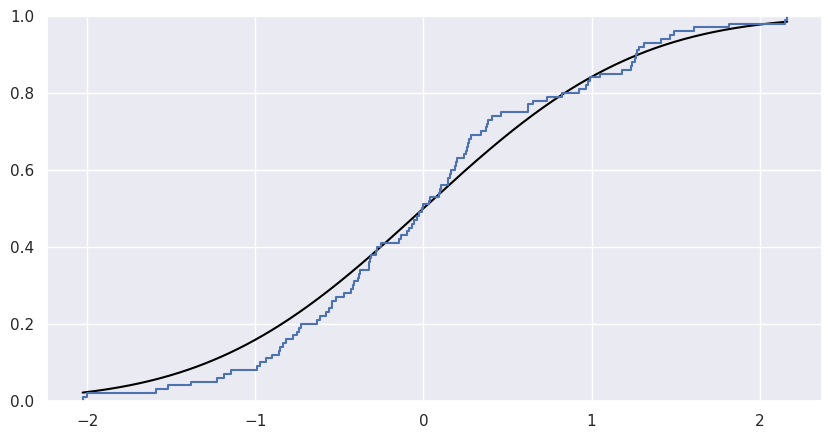

In [7]:
convergence_en_loi_CLT(100,100)

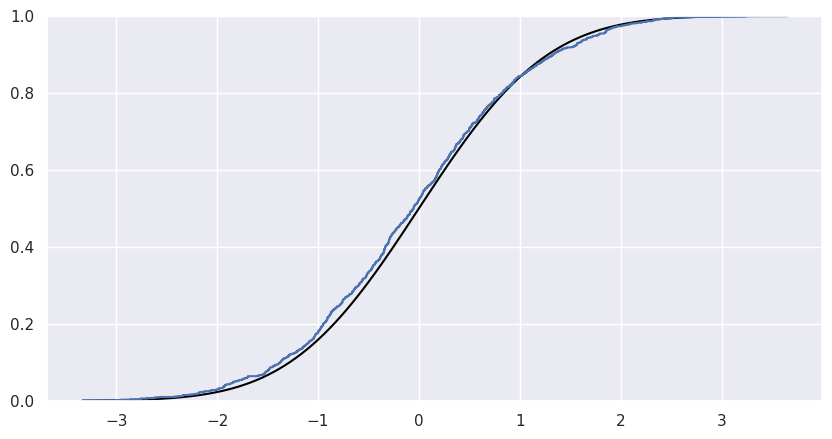

In [8]:
convergence_en_loi_CLT(100,1000)

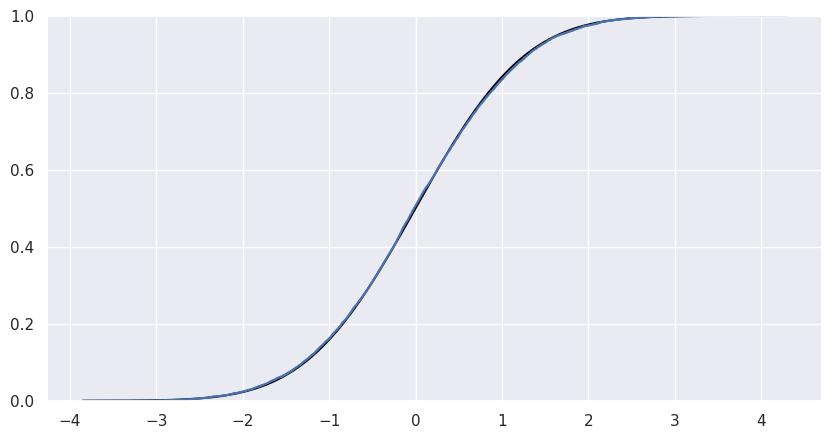

In [9]:
convergence_en_loi_CLT(100,10000)

# Exercice 16

In [10]:
def convergence_ps_max(N):
    alea = np.maximum.accumulate(scs.expon.rvs(size = N))
    scaled_alea = alea[1:]/np.log(np.arange(2,N+1))
    fig, ax = plt.subplots(figsize=(10,5))
    ax.plot(np.arange(2,N+1), scaled_alea, color="blue")
    ax.set_xlabel("$k$")
    ax.set_ylabel("$L_k / \log k$")
    ax.set_title("Convergence presque sûre des maxima renormalisés (ratios)")
    plt.show()

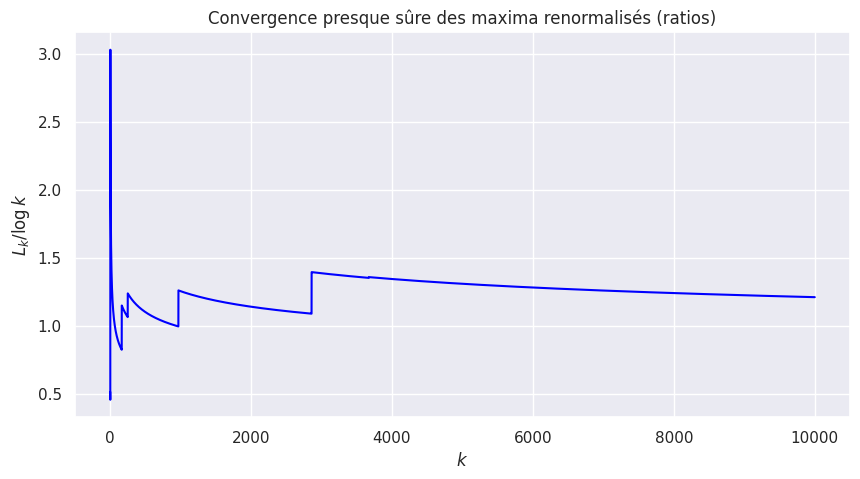

In [11]:
convergence_ps_max(10000)

In [12]:
def non_convergence_ps_max_2(N):
    alea = np.maximum.accumulate(scs.expon.rvs(size = N))
    scaled_alea = alea[1:] - np.log(np.arange(2,N+1))
    fig, ax = plt.subplots(figsize=(10,5))
    ax.plot(np.arange(2,N+1), scaled_alea, color="red")
    ax.set_xlabel("$k$")
    ax.set_ylabel("$L_k - \log k$")
    ax.set_title("Non-convergence presque sûre des maxima renormalisés (différences)")
    plt.show()

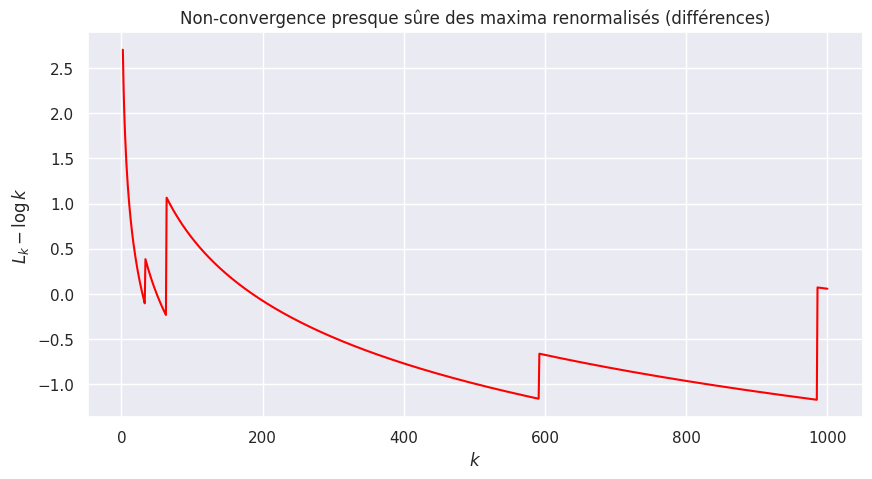

In [13]:
non_convergence_ps_max_2(1000)

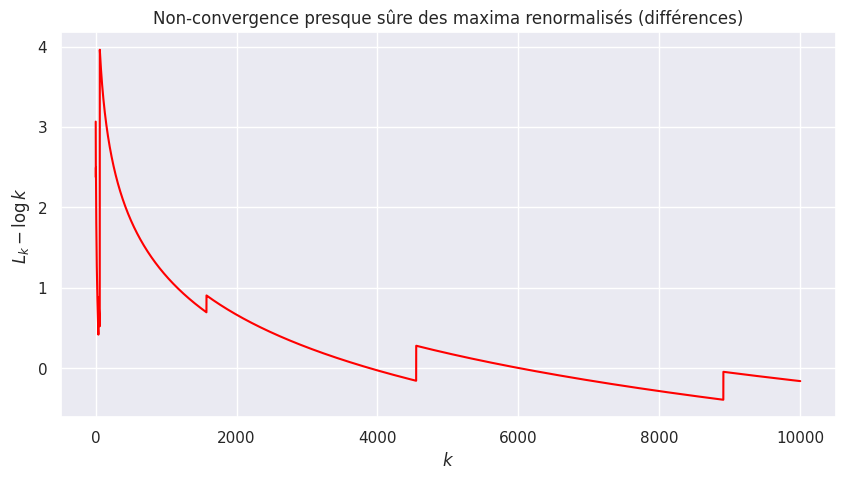

In [14]:
non_convergence_ps_max_2(10000)

Si $E$ est une variable exponentielle de paramètre $1$, alors on a $P[L_N \leq t] = P[E \leq t]^N = (1-\mathrm{e}^{-t})^N$, donc :
$$ P[L_N \leq \log N + t] = \left(1 - \frac{\mathrm{e}^{-t}}{N} \right)^N \to \mathrm{e}^{-\mathrm{e}^{-t}}.$$

In [17]:
def convergence_en_loi_max(N, M):
    alea = (lambda x : x - np.log(N))(scs.expon.rvs(size = (N, M)).max(axis=0))
    xx = np.linspace(min(alea), max(alea), 500)
    fig, ax = plt.subplots(figsize=(10,5))
    ax.plot(xx, (lambda x : np.exp(-np.exp(-x)))(xx), color="black")
    ax.ecdf(alea)
    plt.show()

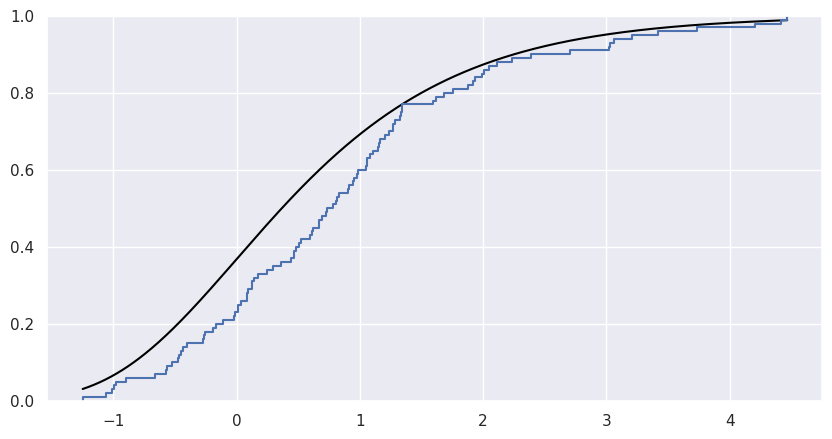

In [18]:
convergence_en_loi_max(10,100)

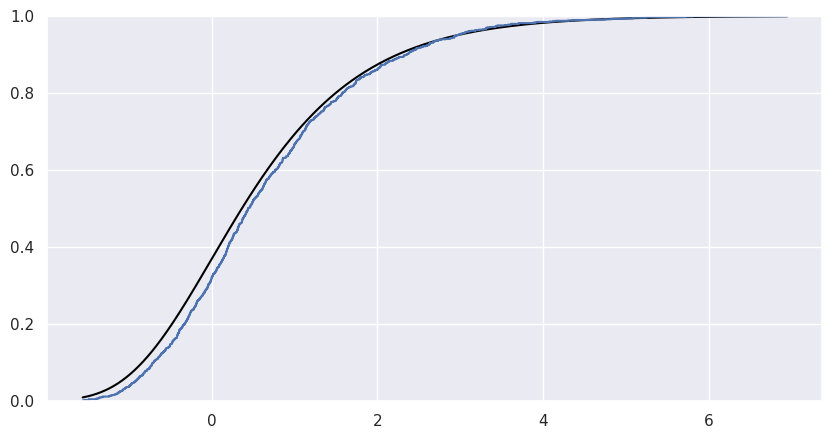

In [19]:
convergence_en_loi_max(10,1000)

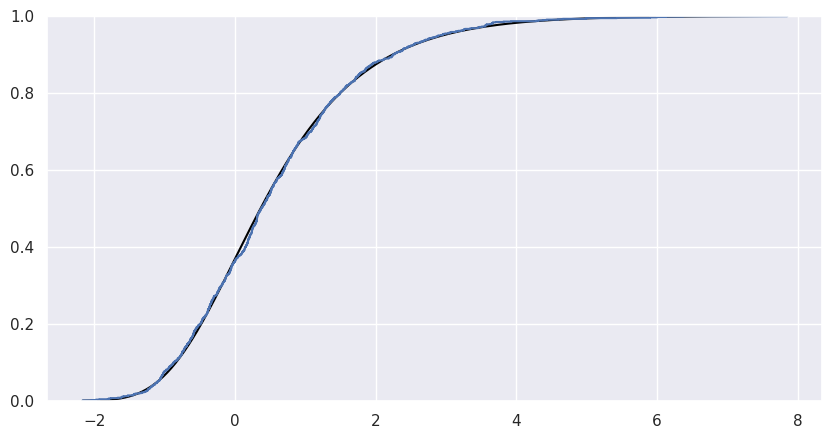

In [20]:
convergence_en_loi_max(1000,1000)